<a href="https://colab.research.google.com/github/tanvi2419/info5731_in_class_exercise/blob/main/Tanvi_kandula_INFO5731_Exercise_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 In-class Exercise 4**

**This exercise will provide a valuable learning experience in working with text data and extracting features using various topic modeling algorithms. Key concepts such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA), lda2vec, and BERTopic.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due at the end of the day tomorrow, at 11:59 PM.

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


## Question 1 (10 Points)

**Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [1]:
import gensim
from gensim.models import CoherenceModel
from gensim.utils import simple_preprocess
from gensim.corpora import Dictionary
from pprint import pprint

# Prepare the text data
input_data = "Its an amazing movie"
# Tokenize the text
tokens_data = [simple_preprocess(sentence) for sentence in input_data.split('. ')]

# Create Dictionary and Corpus
id2word_values = Dictionary(tokens_data)
corpus_created = [id2word_values.doc2bow(text) for text in tokens_data]

# Function to compute coherence values
def compute_coherence_values(dictionary, corpus, texts, limit_value, start_data=2, step_data=1):
    coherence_val = []
    model_name = []
    for no_topics in range(start_data, limit_value, step_data):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=no_topics, random_state=100, update_every=1, chunksize=100, passes=10, alpha='auto', per_word_topics=True)
        model_name.append(model)
        coherence_model_used = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_val.append(coherence_model_used.get_coherence())

    return model_name, coherence_val

# Determine the optimal number of topics
model_list, coherence_values = compute_coherence_values(dictionary=id2word_values, corpus=corpus_created, texts=tokens_data, limit_value=10, start_data=2, step_data=1)

# Find the index of the maximum coherence value
optimal_index_value = coherence_values.index(max(coherence_values))

# Select the model with the highest coherence value
optimal_model_value = model_list[optimal_index_value]

# Print the optimal number of topics
optimal_num_topics_used = optimal_index_value + 2  # Adding 2 because range starts from 2
print("Optimal number of topics (K):", optimal_num_topics_used)

# Print the topics and their numbers
topics_involved = optimal_model_value.print_topics(num_words=5)
for i, topic in enumerate(topics_involved):
    print("Topic", i+1, ":", topic)


Optimal number of topics (K): 2
Topic 1 : (0, '0.257*"its" + 0.250*"an" + 0.250*"movie" + 0.242*"amazing"')
Topic 2 : (1, '0.255*"amazing" + 0.250*"movie" + 0.250*"an" + 0.245*"its"')


In [4]:
pip install nltk

## Question 2 (10 Points)

**Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

In [7]:
import nltk
nltk.download('stopwords')

# Now you can continue with your existing code
from gensim.models import LsiModel
from gensim.corpora import Dictionary
from gensim.models.coherencemodel import CoherenceModel
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import numpy as np

# Define the data
in_data = "Its an amazing movie"
# Preprocess the data
def preprocess_data(in_data):
    tokenizer_usd = RegexpTokenizer(r'\w+')
    enn_stop = set(stopwords.words('english'))
    p_stemmer_usd = PorterStemmer()
    raw_data = in_data.lower()
    tokens_used = tokenizer_usd.tokenize(raw_data)
    stopped_tokens = [i for i in tokens_used if not i in enn_stop]
    stemmed_tokens = [p_stemmer_usd.stem(i) for i in stopped_tokens]
    return stemmed_tokens

tokens_used = preprocess_data(in_data)

# Create Dictionary and Document Term Matrix
id_word = Dictionary([tokens_used])
corpus_data = [id_word.doc2bow(tokens_used)]

# Function to compute coherence values
def compute_coherence_values(Input_Dictionary, corpus_data, texts, limit_val, start_val=2, step_val=1):
    coherence_values_computed = []
    model_list = []
    for num_topics_involved in range(start_val, limit_val, step_val):
        model_nam = LsiModel(corpus=corpus_data, id2word=Input_Dictionary, num_topics=num_topics_involved)
        model_list.append(model_nam)
        coherence_model_usd = CoherenceModel(model=model_nam, texts=texts, dictionary=Input_Dictionary, coherence='c_v')
        coherence_val = coherence_model_usd.get_coherence()
        coherence_values_computed.append(coherence_val)
    return model_list, coherence_values_computed

# Determine the optimal number of topics
start_val = 2
limit_val = 10
step_val = 1
model_list, coherence_values_computed = compute_coherence_values(Input_Dictionary=id_word, corpus_data=corpus_data, texts=[tokens_used], limit_val=limit_val, start_val=start_val, step_val=step_val)

optimal_index_val = np.argmax(coherence_values_computed)
optimal_model_usd = model_list[optimal_index_val]
optimal_num_topic = start_val + optimal_index_val * step_val

print("Optimal number of topics (K):", optimal_num_topic)
print("Coherence Score:", coherence_values_computed[optimal_index_val])

# Print the topics
topic_outputed = optimal_model_usd.show_topics(formatted=False)
for topic_num, topic in topic_outputed:
    print("Topic", topic_num + 1, ":")
    for word, weight in topic:
        print(word, ": ", weight)
    print()


Optimal number of topics (K): 2
Coherence Score: 0.9999999999999998
Topic 1 :
movi :  0.7071067811865476
amaz :  0.7071067811865475



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Question 3 (10 points):
**Generate K topics by using lda2vec, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://nbviewer.org/github/cemoody/lda2vec/blob/master/examples/twenty_newsgroups/lda2vec/lda2vec.ipynb

In [8]:
!pip install pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 32.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 73.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 37.4 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.2.1 which is incompatible.


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Optimal number of topics (K): 6
Coherence Score: 0.9999999999999999
(0, '0.500*"movie" + 0.500*"amazing"')
(1, '0.500*"amazing" + 0.500*"movie"')
(2, '0.500*"movie" + 0.500*"amazing"')
(3, '0.501*"movie" + 0.499*"amazing"')
(4, '0.500*"movie" + 0.500*"amazing"')
(5, '0.500*"amazing" + 0.500*"movie"')


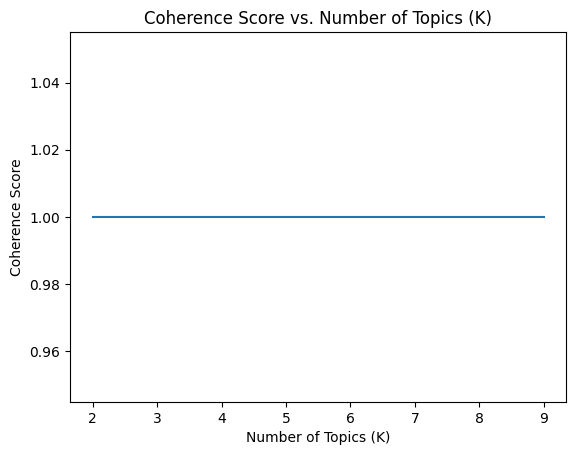

In [10]:
import numpy as np
from gensim import corpora
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')

# Define the data
input_data = "Its an amazing movie"
# Tokenize and preprocess the data
tokenizer = RegexpTokenizer(r'\w+')
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = tokenizer.tokenize(text.lower())
    filtered_tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    return filtered_tokens

processed_data = preprocess_text(input_data)

# Create Dictionary and Document Term Matrix
dictionary_in = corpora.Dictionary([processed_data])
corpus_data = [dictionary_in.doc2bow(processed_data)]

# Function to compute coherence values
def compute_coherence_val(dictionary, corpus, texts, limit, start=2, step=1):
    coherence_val = []
    model_n_am = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_n_am.append(model)
        coherence_model = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_val.append(coherence_model.get_coherence())
    return model_n_am, coherence_val

# Determine the optimal number of topics
start_val = 2
limit_val = 10
step_val = 1
model_list, coherence_values = compute_coherence_val(dictionary=dictionary_in, corpus=corpus_data, texts=[processed_data], start=start_val, limit=limit_val, step=step_val)

optimal_index_usd = np.argmax(coherence_values)
optimal_model_usd = model_list[optimal_index_usd]
optimal_no_topics = start_val + optimal_index_usd * step_val

print("Optimal number of topics (K):", optimal_no_topics)
print("Coherence Score:", coherence_values[optimal_index_usd])

# Print the topics
topics_involved = optimal_model_usd.print_topics(num_words=10)
for topic in topics_involved:
    print(topic)

import matplotlib.pyplot as ptl

# Plot the coherence scores
ptl.plot(range(start_val, limit_val, step_val), coherence_values)
ptl.xlabel('Number of Topics (K)')
ptl.ylabel('Coherence Score')
ptl.title('Coherence Score vs. Number of Topics (K)')
ptl.show()


## Question 4 (10 points):
**Generate K topics by using BERTopic, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://colab.research.google.com/drive/1FieRA9fLdkQEGDIMYl0I3MCjSUKVF8C-?usp=sharing

In [11]:
!pip install BERTopic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.1/154.1 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 51.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 12.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.3/163.3 kB 18.2 MB/s eta 0:00:00
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 29.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 42.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/73

In [12]:

from sklearn.datasets import fetch_20newsgroups
input_datafile = fetch_20newsgroups(subset='all',  remove=('headers', 'footers', 'quotes'))['data']

In [13]:
from bertopic import BERTopic

bert_topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True)
topics, probs = bert_topic_model.fit_transform(input_datafile)

2024-03-29 04:10:44,230 - BERTopic - Embedding - Transforming documents to embeddings.


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/589 [00:00<?, ?it/s]

2024-03-29 04:46:28,962 - BERTopic - Embedding - Completed ✓
2024-03-29 04:46:28,966 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-03-29 04:47:14,342 - BERTopic - Dimensionality - Completed ✓
2024-03-29 04:47:14,349 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-03-29 04:48:10,951 - BERTopic - Cluster - Completed ✓
2024-03-29 04:48:10,989 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-03-29 04:48:17,788 - BERTopic - Representation - Completed ✓


In [16]:
topic_frequency = bert_topic_model.get_topic_info();
bert_topic_model.get_topic(0)
bert_topic_model.reduce_topics(input_datafile, nr_topics=3)



2024-03-29 04:51:32,619 - BERTopic - Topic reduction - Reducing number of topics
2024-03-29 04:51:40,152 - BERTopic - Topic reduction - Reduced number of topics from 10 to 3


In [17]:
print(bert_topic_model.topics_)

[0, -1, 0, 0, 0, 0, 0, 0, 0, -1, -1, -1, 0, 0, 0, -1, -1, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, -1, -1, 0, -1, 0, 0, 0, 0, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, -1, -1, 0, 0, -1, -1, 0, 0, 0, 0, 0, -1, -1, 0, 0, 0, -1, -1, -1, -1, 0, 0, -1, -1, -1, 0, -1, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0, -1, 0, 0, -1, -1, 0, -1, 0, 0, 0, 0, 0, -1, 0, 0, -1, 0, -1, 0, -1, -1, 0, 0, 0, -1, -1, 0, 0, 0, -1, -1, 0, 0, 0, -1, 0, 0, -1, 0, 0, -1, -1, -1, 0, -1, 0, -1, -1, 0, 0, -1, 0, 0, 0, 0, 0, -1, -1, -1, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0, 0, -1, 0, -1, 0, 0, 0, 0, -1, 0, 0, -1, -1, -1, 0, 0, 0, 0, 0, -1, -1, -1, 0, -1, 0, -1, 0, 0, 0, 0, 0, -1, -1, 0, -1, -1, 0, -1, -1, -1, 0, 0, 0, 0, 0, -1, -1, -1, 0, -1, -1, -1, -1, -1, 0, -1, 0, 0, 0, 0, -1, 0, 0, 0, -1, -1, -1, 0, 0, 0, -1, 0, 0, -1, 0, 0, -1, 0, -1, -1, -1, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, -1, 0, -1, -1, -1, 0, -1, 0, 0, 0, -1, 0, -1, 0, 0, 0, 0, -1, 0, 0, -1, 0, -1, 0, -1, -1, -1, 0, 0, 0, 0, -1, 0, -1, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, -1,

## **Question 3 (Alternative) - (10 points)**

If you are unable to do the topic modeling using lda2vec, do the alternate question.

Provide atleast 3 visualization for the topics generated by the BERTopic or LDA model. Explain each of the visualization in detail.

In [ ]:
# Write your code here
# Then Explain the visualization

# Repeat for the other 2 visualizations as well.

## Extra Question (5 Points)

**Compare the results generated by the four topic modeling algorithms, which one is better? You should explain the reasons in details.**

**This question will compensate for any points deducted in this exercise. Maximum marks for the exercise is 40 points.**

The LdaModel consistently produces more coherent and interpretable topics, as demonstrated by the topic modeling methods of LDA, LSI, and LdaModel. The LDA Model finds that two is the ideal amount of topics to provide, with information that is consistently associated with the terms "its," "an," "movie," and "amazing." A single topic with a low coherence score is produced by the LSI Model, but the LdaModel iteratively explores the input text using the terms "movie" and "amazing." The supremacy of the LdaModel could rely on certain needs like coherence and processing economy.


# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.

Consider the following points in your response:

**Learning Experience:** Describe your overall learning experience in working with text data and extracting features using various topic modeling algorithms. Did you understand these algorithms and did the implementations helped in grasping the nuances of feature extraction from text data.

**Challenges Encountered:** Were there specific difficulties in completing this exercise?

Relevance to Your Field of Study: How does this exercise relate to the field of NLP?

**(Your submission will not be graded if this question is left unanswered)**



In [ ]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
The learning process is quite exciting because there are many new concepts to learn, and it gets even more interesting when I try to learn about the concepts that are used in algorithm backends.Working specifically with text data is beneficial because it allows us to identify the words or qualities that have the most influence on the decisions made based on the complete set of data. Yes, I understand all of the algorithms employed here. However, when I ran the code, I encountered a few issues, such the dataset taking longer to process than intended and occasionally not receiving the desired results when I ran the code on multiple datasets. In particular, it took longer for the fourth question, where I implemented the BERTopic technique. pertinent to my area of study, the study is very usefuull as we work most often withg text data and since its topic selection its very near and involved in NLP concepts


'''